# COMANDO DA QUESTÃO B
Aplique o TLC a função de distribuição gama e avalie quatro diferentes tamanhos de amostra, começando em 10.

O TCL afirma que, independentemente da distribuição da população (desde que tenha média μ e desvio padrão σ finitos), a distribuição das médias amostrais (Xˉ) retiradas dessa população se aproximará de uma Distribuição Normal com média  e Desvio Padrão 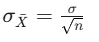 à medida que o tamanho da amostra (n) aumenta.

Para isso, vamos simular o processo gerando 10.000 amostras de diferentes tamanhos (n) a partir da população Gama (k=2, θ=2), calcular a média (xˉ) para cada amostra, plotar o histograma das médias amostrais para cada _n_ e sobrepor a curva da Distribuição Normal teórica prevista pelo TLC 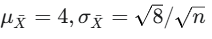 para ver o ajuste


População Gama(k=2.0, θ=2.0):
  Média Teórica (μ): 4.0000
  Desvio Padrão Teórico (σ): 2.8284
  Variância Teórica (σ²): 8.0000


<>:55: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\o'
<>:55: SyntaxWarning: invalid escape sequence '\o'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:69: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Cleve\AppData\Local\Temp\ipykernel_10260\786748552.py:55: SyntaxWarning: invalid escape sequence '\o'
  ax.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', label='Médias Amostrais ($\overline{x}$)')
C:\Users\Cleve\AppData\Local\Temp\ipykernel_10260\786748552.py:62: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(x_norm, pdf_norm, 'k-', lw=2, label=f'Normal Teórica (TCL)\n($\mu={pop_mean_gamma:.1f}, \sigma_{{\\bar{{X}}}}={theoretical_se:.3f}$)')
C:\Users\Cleve\AppData\Local\Temp\ipykernel_10260\786748552.py:62: SyntaxWarning: invalid escape sequence '

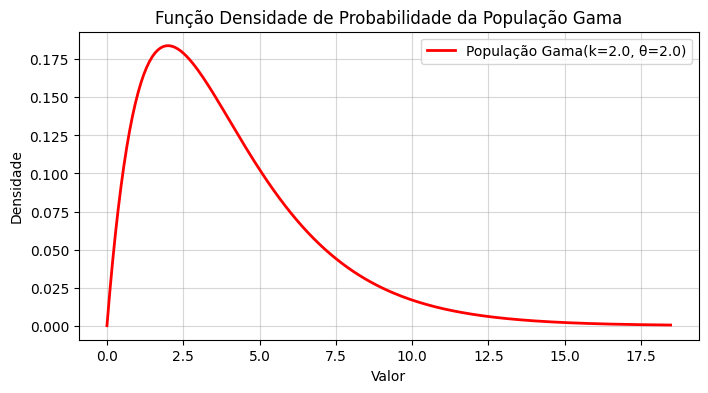

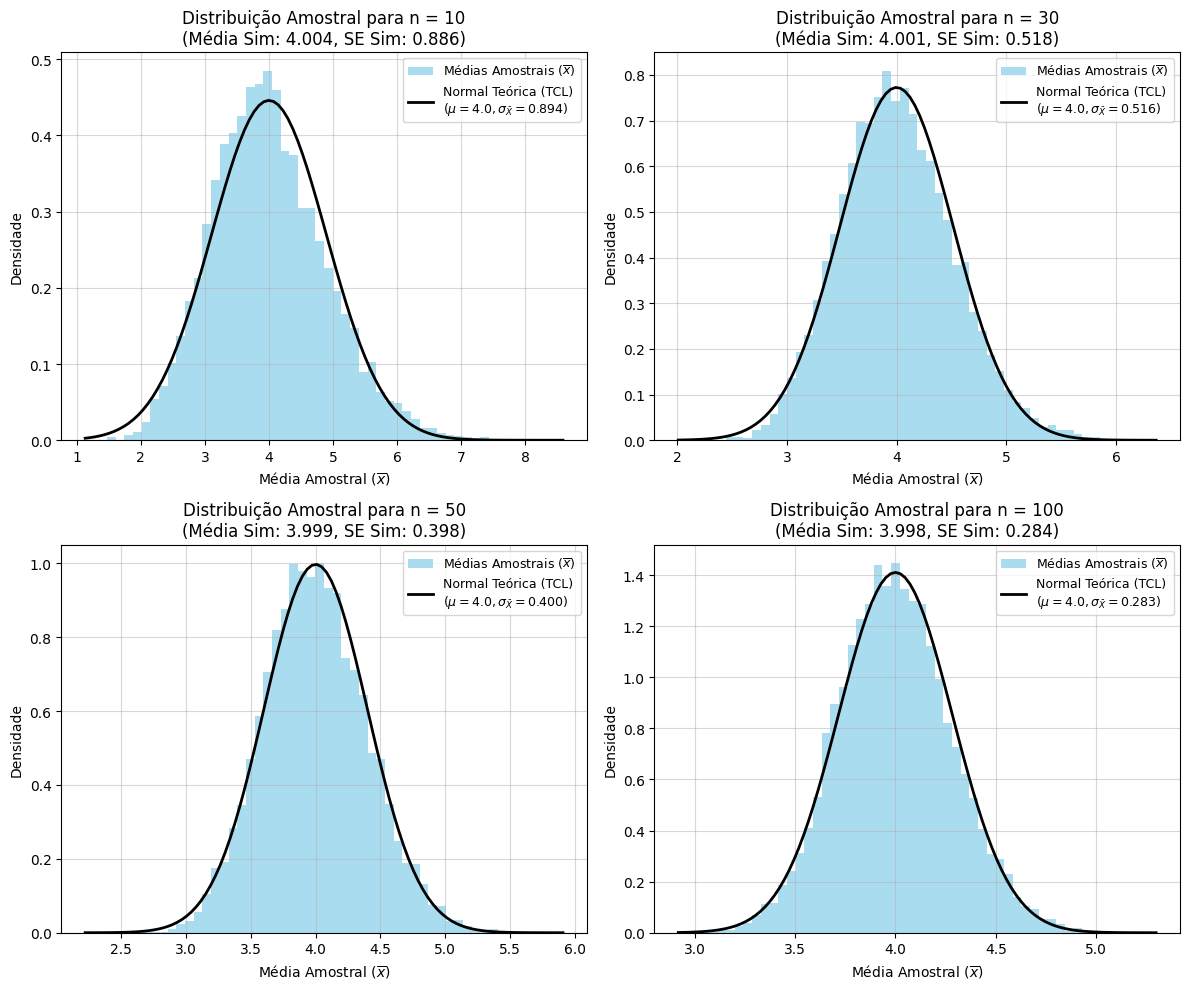

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parâmetros da Distribuição Gama da População
k_shape = 2.0  # Parâmetro de forma (alpha)
theta_scale = 2.0 # Parâmetro de escala (theta)

# Calcular média e desvio padrão teóricos da população
pop_mean_gamma = k_shape * theta_scale
pop_std_dev_gamma = np.sqrt(k_shape) * theta_scale
pop_variance_gamma = k_shape * theta_scale**2

print(f"População Gama(k={k_shape}, θ={theta_scale}):")
print(f"  Média Teórica (μ): {pop_mean_gamma:.4f}")
print(f"  Desvio Padrão Teórico (σ): {pop_std_dev_gamma:.4f}")
print(f"  Variância Teórica (σ²): {pop_variance_gamma:.4f}")

# Visualizar a População Gama
plt.figure(figsize=(8, 4))
x_gamma = np.linspace(0, stats.gamma.ppf(0.999, a=k_shape, scale=theta_scale), 200)
pdf_gamma = stats.gamma.pdf(x_gamma, a=k_shape, scale=theta_scale)
plt.plot(x_gamma, pdf_gamma, 'r-', lw=2, label=f'População Gama(k={k_shape}, θ={theta_scale})')
plt.title('Função Densidade de Probabilidade da População Gama')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


# Parâmetros da Simulação
num_simulations = 10000  # Número de médias amostrais a gerar para cada n
sample_sizes = [10, 30, 50, 100] # Tamanhos de amostra a avaliar

# Preparar figura para os resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel() # Achatar o array de eixos para facilitar o loop

# Loop pelos diferentes tamanhos de amostra
for i, n in enumerate(sample_sizes):
    sample_means = []
    # Gerar 'num_simulations' amostras de tamanho 'n'
    for _ in range(num_simulations):
        # Retirar amostra da distribuição Gama
        sample = stats.gamma.rvs(a=k_shape, scale=theta_scale, size=n)
        # Calcular e armazenar a média da amostra
        sample_means.append(np.mean(sample))

    # Calcular o Erro Padrão teórico para este n
    theoretical_se = pop_std_dev_gamma / np.sqrt(n)

    # Plotar o histograma das médias amostrais
    ax = axes[i]
    ax.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', label='Médias Amostrais ($\overline{x}$)')

    # Sobrepor a curva Normal prevista pelo TCL
    xmin, xmax = ax.get_xlim()
    x_norm = np.linspace(xmin, xmax, 100)
    # Média da Normal é a média da população, desvio padrão é o Erro Padrão
    pdf_norm = stats.norm.pdf(x_norm, loc=pop_mean_gamma, scale=theoretical_se)
    ax.plot(x_norm, pdf_norm, 'k-', lw=2, label=f'Normal Teórica (TCL)\n($\mu={pop_mean_gamma:.1f}, \sigma_{{\\bar{{X}}}}={theoretical_se:.3f}$)')

    # Calcular média e std dev das médias amostrais simuladas (para comparação)
    simulated_mean = np.mean(sample_means)
    simulated_se = np.std(sample_means)

    ax.set_title(f'Distribuição Amostral para n = {n}\n(Média Sim: {simulated_mean:.3f}, SE Sim: {simulated_se:.3f})')
    ax.set_xlabel('Média Amostral ($\overline{x}$)')
    ax.set_ylabel('Densidade')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()